In [25]:
import numpy as np                                       
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
class LogisticRegression:
    
    def __init__(self, learningRate = 0.0001, iterations = 1000):
        """
        Constructor, the default lr and n_iters are declared
        """
        
        self.m = None
        self.n = None
        self.weights = None
        self.bias = None
        self.iterations = iterations
        self.learningRate = learningRate
        
    def lossFunction(self, y, yHat):
        """
        Binary cross entropy as loss function
        """
        
        yZeroLoss = y * np.log(yHat + 1e-9)
        yOneLoss = (1-y) * np.log(1 - yHat + 1e-9)
        return -np.mean(yZeroLoss + yOneLoss)
    
    def sigmoid(self, x):
        """
        The sigmoid function for calculating the probability
        """
        return 1.0/(1+np.exp(-x))
    
    def gradientDescent(self, X, y):
        """
        Gradient descent, which will update the weights for self.iterations until a minima is reached
        """
        
        for iteration in range(self.iterations):
            y = y.astype(np.float64)
            yHat = self.predict(X)
            
            dw = np.matmul(X.transpose(), yHat-y)
            dw = np.array([np.mean(gradient) for gradient in dw])
            db = np.mean(yHat-y)
            
            #Updation of weights
            
            self.weights -= self.learningRate * dw
            self.bias -= self.learningRate * db
            
            print(f'Iteration: {iteration+1}, Loss: {self.lossFunction(yHat, y)}')
    
    def fit(self, X_train, y_train):
        """
        Training of model on data X_train and y_train
        """
        
        
        #Initializing the wights, biases and the dimensions
        
        self.m , self.n = X_train.shape
        self.weights = np.ones(self.n, dtype=np.float64)
        self.bias = 0
        
        # Gradient descent
        self.gradientDescent(X_train, y_train)
        self.evaluate(X_train, y_train)
            
    def predict(self, X):
        """
        Predicting the probability of labels by a given features. If probability >= threshold the label is 1. Else 0.
        """
        
        return np.array([self.sigmoid(np.dot(x, self.weights)+self.bias) for x in X])
    
    def predictLabels(self, X, threshold=0.5):
        """
        Predicting the labels by a given features
        """
        
        preds = self.predict(X)
        return np.array([1 if value >= threshold else 0 for value in preds])
    
    def evaluate(self, X_test, y_test, threshold=0.5):
        """
        Calculating the accuracy and precision on a given data.
        """
        
        preds = self.predictLabels(X_test)
     
        N = y_test.shape[-1]
        accuracy = (y_test == preds).sum() / N
        TP = ((preds == 1) & (y_test == 1)).sum()                     # True positives
        FP = ((preds == 1) & (y_test == 0)).sum()                     # False positives
        precision = TP / (TP+FP)
        
        print(f'Accuracy: {accuracy}, Precision: {precision}')

In [3]:
dataTrain = pd.read_csv('titanic.csv')
dataTest = pd.read_csv('titanic.csv')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


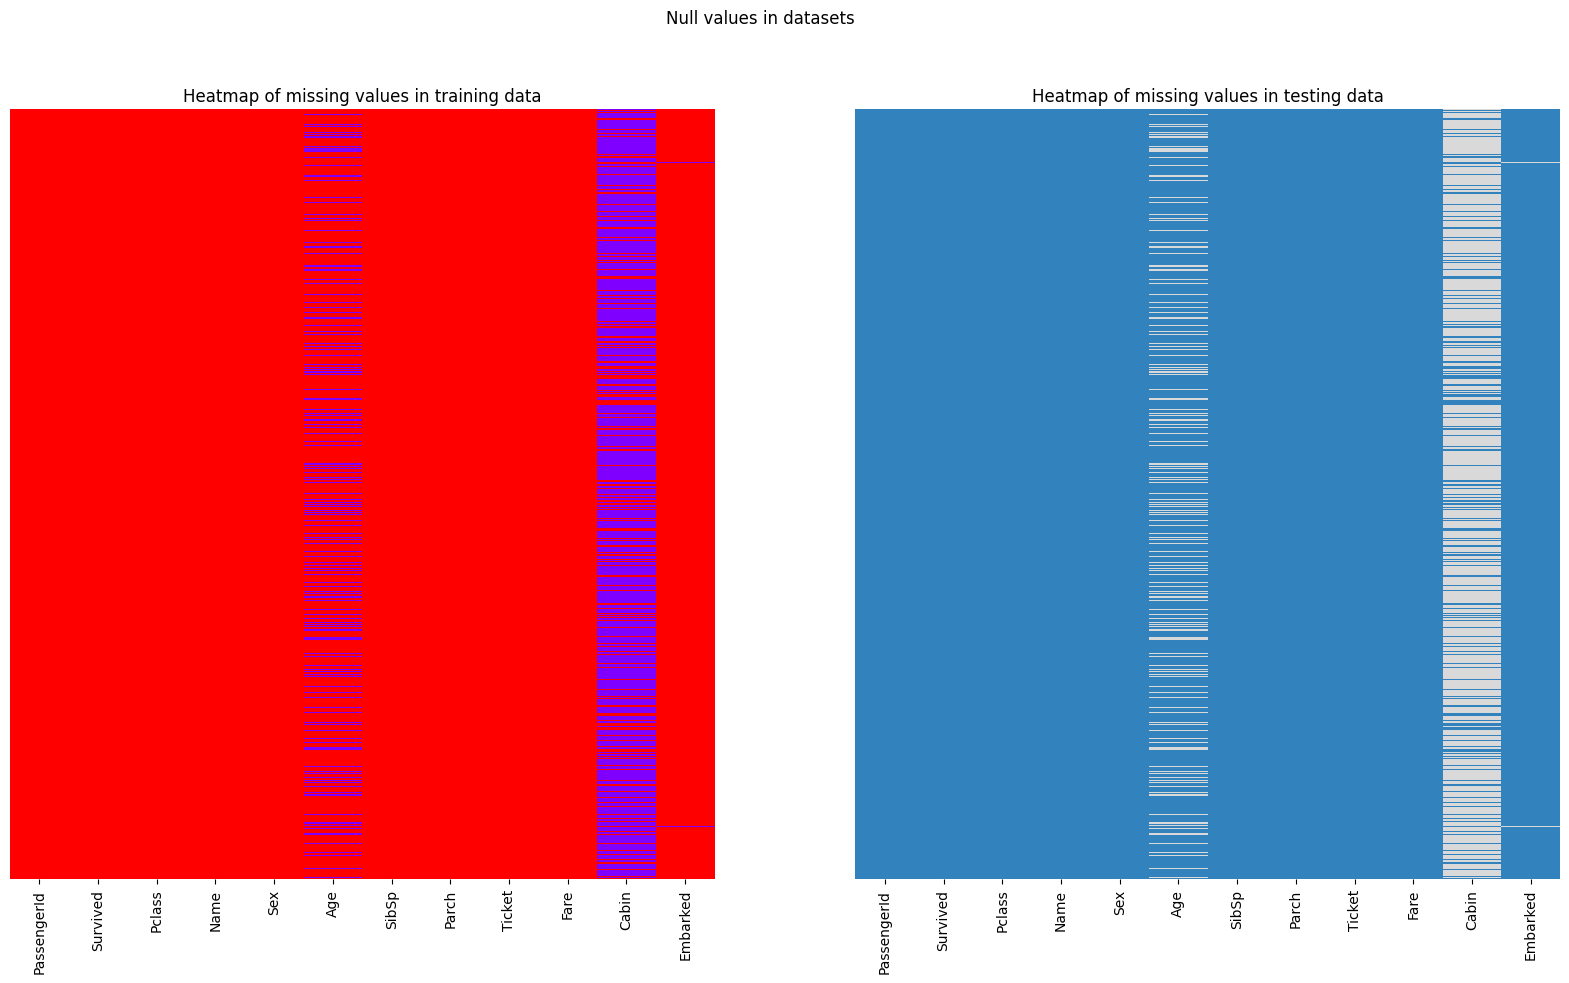

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
sns.heatmap(ax=axes[0], yticklabels=False, data=dataTrain.isnull(), cbar=False, cmap="rainbow_r")
sns.heatmap(ax=axes[1], yticklabels=False, data=dataTest.isnull(), cbar=False, cmap="tab20c")
axes[0].set_title('Heatmap of missing values in training data')
axes[1].set_title('Heatmap of missing values in testing data')
plt.suptitle('Null values in datasets')
plt.show()


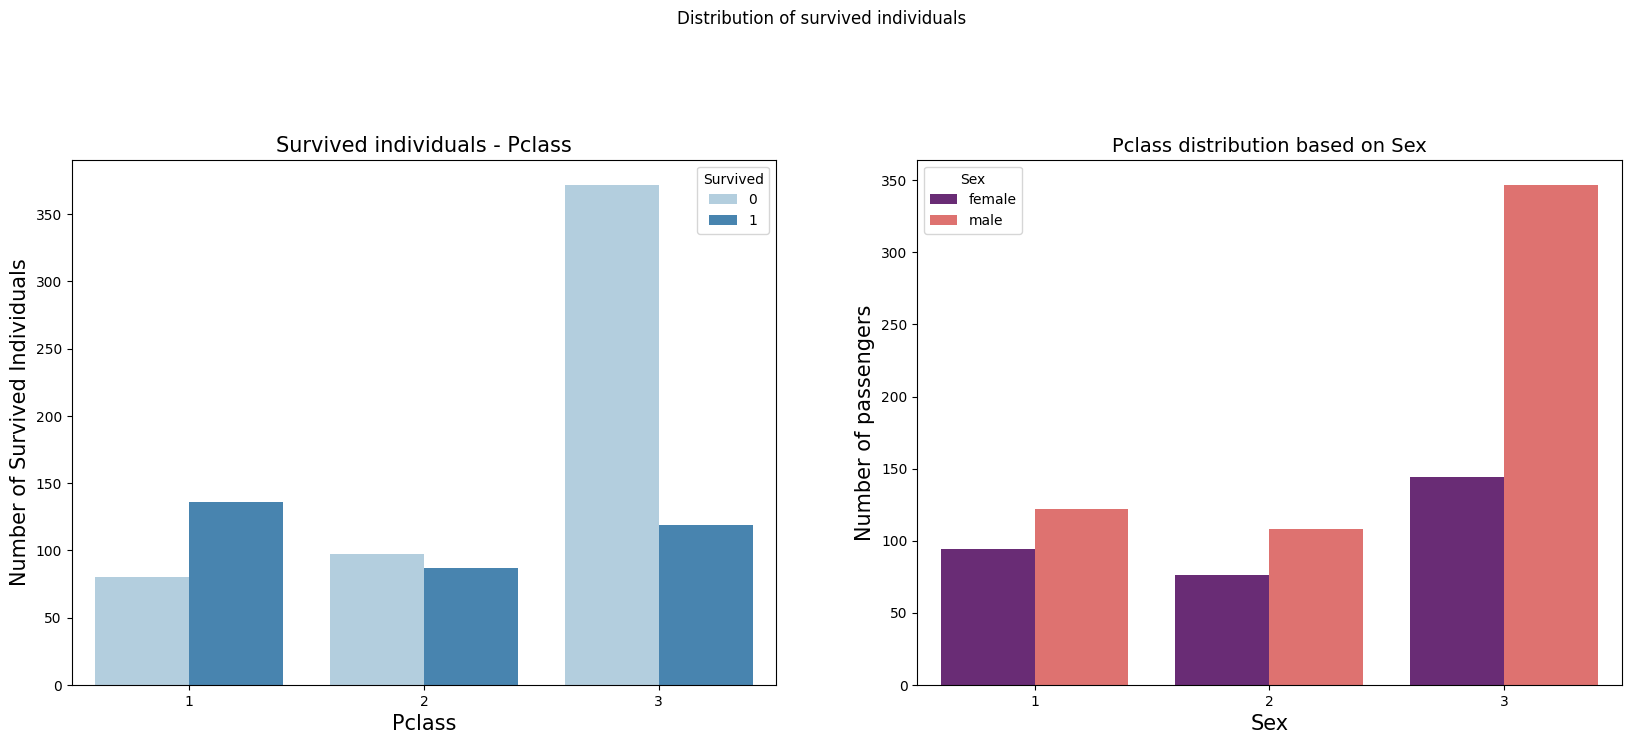

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x = dataTrain.Pclass, hue = dataTrain.Survived, palette="Blues")
plt.title('Survived individuals - Pclass', fontsize=15)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Number of Survived Individuals', fontsize=15)

plt.subplot(2,2,2)
sns.countplot(x = dataTrain.Pclass, hue = dataTrain.Sex, palette="magma")
plt.title('Pclass distribution based on Sex', fontsize=14)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
plt.suptitle('Distribution of survived individuals')
plt.show()

In [10]:
dataTrain.replace(to_replace="male", value=1, inplace=True)
dataTrain.replace(to_replace="female", value=0, inplace=True)

dataTest.replace(to_replace="male", value=1, inplace=True)
dataTest.replace(to_replace="female", value=0, inplace=True)

idCol = dataTest.PassengerId.to_numpy()
dataTrain.set_index('PassengerId', inplace=True)
dataTest.set_index('PassengerId', inplace=True)

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataTrain = pd.DataFrame(imputer.fit_transform(dataTrain), columns=dataTrain.columns, index=dataTrain.index)
dataTest = pd.DataFrame(imputer.fit_transform(dataTest), columns=dataTest.columns, index=dataTest.index)
dataTrain = dataTrain.reset_index(drop=True)
dataTest = dataTest.reset_index(drop=True)

In [14]:
dataTrain.Age = dataTrain.Age.astype('int')
dataTrain.Fare = dataTrain.Fare.astype('int')
dataTrain.SibSp = dataTrain.SibSp.astype('int')
dataTrain.Parch = dataTrain.Parch.astype('int')
dataTrain.Pclass = dataTrain.Pclass.astype('int')
dataTrain.Sex = dataTrain.Sex.astype('int')
dataTrain.Survived = dataTrain.Survived.astype('int')

dataTrain.drop(columns=['Cabin', 'Name', 'Ticket', 'Embarked'], inplace=True)
dataTest.drop(columns=['Cabin', 'Name', 'Ticket', 'Embarked'], inplace=True)

In [15]:
yTrain = dataTrain.pop('Survived').to_numpy()
xTrain = dataTrain.to_numpy()
xTest = dataTest.to_numpy()
for i,x in enumerate(yTrain):
    yTrain[i] = float(x)
xTrain.shape, yTrain.shape, xTest.shape

((891, 6), (891,), (891, 7))

In [16]:
lrClassifier = LogisticRegression(learningRate=0.1, iterations=15)
lrClassifier.fit(xTrain, yTrain)

Iteration: 1, Loss: 12.768881021364226
Iteration: 2, Loss: 7.954384866090542
Iteration: 3, Loss: 6.6752677909948614
Iteration: 4, Loss: 6.721697048691411
Iteration: 5, Loss: 7.954384866090542
Iteration: 6, Loss: 12.768880969855868
Iteration: 7, Loss: 7.53573313113917
Iteration: 8, Loss: 12.768880969855868
Iteration: 9, Loss: 7.954384866090542
Iteration: 10, Loss: 8.512587312903912
Iteration: 11, Loss: 6.744946231328441
Iteration: 12, Loss: 6.41940646307082
Iteration: 13, Loss: 6.744946231328237
Iteration: 14, Loss: 12.768880969855868
Iteration: 15, Loss: 7.954384866090542
Accuracy: 0.6778900112233446, Precision: 0.5913621262458472


/var/folders/nh/43735j4x6w7d9trrz7jx15_00000gn/T/ipykernel_7448/34383062.py:28: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-x))


In [ ]:
y_data = dataTrain['Survived']

x_data = dataTrain.drop('Survived', axis = 1)